# Loading the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\Real Life Violence Dataset\NonViolence\NV_1.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_10.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_100.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_1000.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_101.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_102.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_103.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_104.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_105.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_106.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_107.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_108.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_109.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_11.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_110.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_111.mp4
dataset\Real Life Violence Dataset\NonViolence\NV_112.mp4
dataset\Real Life

# Importing the required Libraries 

In [2]:
import cv2
import os
import sys
import glob
from tqdm import tqdm

## Extract Frames from violence and non violence videos and store them in data folder

In [3]:
PATH_violence = r"dataset/real life violence situations/Real Life Violence Dataset/Violence/"

In [5]:
os.makedirs('data/Violence',exist_ok=True)
for path in tqdm(glob.glob(PATH_violence+'/*')):
    fname = os.path.basename(path).split('.')[0]
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
        if count % 5 == 0:
            cv2.imwrite("data/Violence/{}-{}.jpg".format(fname,str(count).zfill(4)),image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1

In [6]:
PATH_nonviolence = r"dataset/real life violence situations/Real Life Violence Dataset/NonViolence/"

In [21]:
os.makedirs('data/NonViolence',exist_ok=True)
for path in tqdm(glob.glob(PATH_nonviolence+'/*')):
    fname = os.path.basename(path).split('.')[0]
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
        if count % 5 == 0:
            cv2.imwrite("data/NonViolence/{}-{}.jpg".format(fname,str(count).zfill(4)),image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1

100%|██████████| 1000/1000 [03:53<00:00,  4.28it/s]


In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### Randomly Display 10 images from violence videos and 10 images from non violence videos

import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


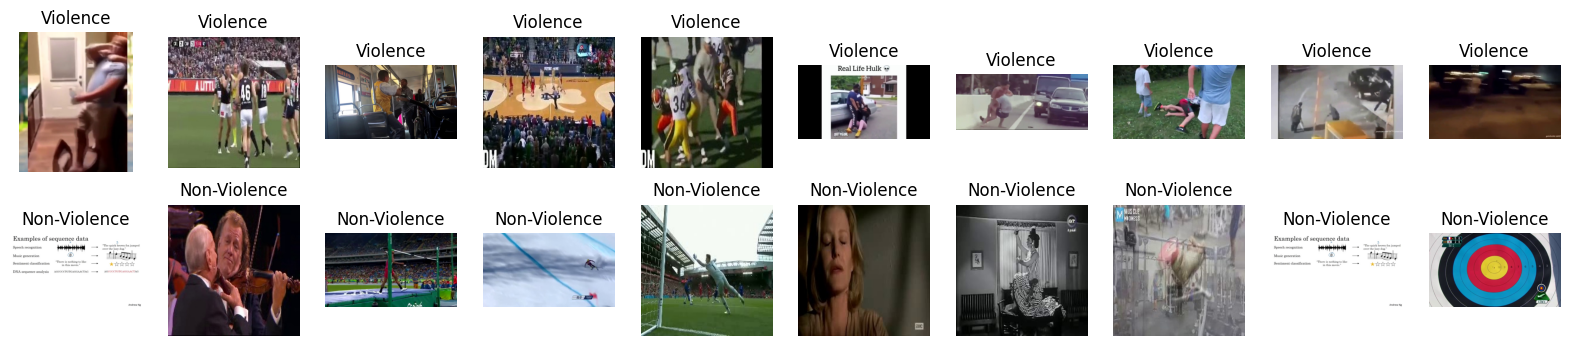

In [8]:
violence_dir = "data/violence"
nonviolence_dir = "data/nonviolence"

violence_images = [os.path.join(violence_dir, f) for f in os.listdir(violence_dir) if os.path.isfile(os.path.join(violence_dir, f))]
nonviolence_images = [os.path.join(nonviolence_dir, f) for f in os.listdir(nonviolence_dir) if os.path.isfile(os.path.join(nonviolence_dir, f))]

random_violence_images = random.sample(violence_images, 10)
random_nonviolence_images = random.sample(nonviolence_images, 10)

fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i, image_path in enumerate(random_violence_images):
    ax = axes[0, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title("Violence")
    ax.axis('off')

for i, image_path in enumerate(random_nonviolence_images):
    ax = axes[1, i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title("Non-Violence")
    ax.axis('off')

plt.show()

# import the necessary packages

In [9]:
import matplotlib
import tensorflow
from tensorflow import keras
matplotlib.use("Agg")

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
import argparse
import pickle
import cv2
import os

In [10]:
from tensorflow.keras.applications import VGG16

In [11]:
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [12]:
args = {
    "dataset": "data",
    "model": "model/violence_model.h5",
    "label-bin": "model/lb.pickle",
    "epochs": 7,
    "plot": "plot.png"
    
}


In [13]:
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS = set(["Violence", "NonViolence"])

In [14]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print('-'*100)
print("[INFO] loading images...")
print('-'*100)
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

----------------------------------------------------------------------------------------------------
[INFO] loading images...
----------------------------------------------------------------------------------------------------


## Resizing the images

In [16]:
# loop over the image paths
for imagePath in tqdm(imagePaths[::]):
    # imagePath : file name ex) V_123
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2] # Violence / NonViolence

    # if the label of the current image is not part of of the labels
    # are interested in, then ignore the image
    if label not in LABELS:
        continue

    # load the image, convert it to RGB channel ordering, and resize
    # it to be a fixed 224x224 pixels, ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

100%|██████████| 57844/57844 [06:56<00:00, 138.82it/s] 


In [17]:
# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [18]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

LabelBinarizer returns output as numpy array. LabelBinarizer is used for one-hot encoding of categorical variables.

In [19]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

## Training Data Augmentation

In [20]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [21]:
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()

In [22]:
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

## Load VGG16 model

In [23]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [24]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

In [25]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [26]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
model.trainable = True

## Compile the model

In [27]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [28]:
len(trainX),len(testX)

(58264, 19422)

## Train the model

In [30]:
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print('-'*100)
print("[INFO] training head...")
print('-'*100)
H = model.fit(
    trainAug.flow(trainX[:10000], trainY[:10000], batch_size=8),
    steps_per_epoch=len(trainX) // 8,
    validation_data=valAug.flow(testX, testY,batch_size=8),
    validation_steps=len(testX) // 8,
    epochs=args["epochs"])

----------------------------------------------------------------------------------------------------
[INFO] training head...
----------------------------------------------------------------------------------------------------
Epoch 1/7


c:\Users\azam\Desktop\Fido Work\fidaenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/7283 ━━━━━━━━━━━━━━━━━━━━ 2:19:37 1s/step - accuracy: 0.7424 - loss: 0.5414

C:\ProgramData\miniconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7283/7283 ━━━━━━━━━━━━━━━━━━━━ 2617s 353ms/step - accuracy: 0.7959 - loss: 0.4461 - val_accuracy: 0.8939 - val_loss: 0.2524
Epoch 2/7
7283/7283 ━━━━━━━━━━━━━━━━━━━━ 1723s 236ms/step - accuracy: 0.8772 - loss: 0.2883 - val_accuracy: 1.0000 - val_loss: 0.0532
Epoch 3/7
7283/7283 ━━━━━━━━━━━━━━━━━━━━ 2543s 349ms/step - accuracy: 0.9031 - loss: 0.2324 - val_accuracy: 0.9225 - val_loss: 0.1939
Epoch 4/7
7283/7283 ━━━━━━━━━━━━━━━━━━━━ 1738s 238ms/step - accuracy: 0.9164 - loss: 0.2069 - val_accuracy: 1.0000 - val_loss: 1.9048e-04
Epoch 5/7
7283/7283 ━━━━━━━━━━━━━━━━━━━━ 2546s 349ms/step - accuracy: 0.9294 - loss: 0.1739 - val_accuracy: 0.9480 - val_loss: 0.1396
Epoch 6/7
7283/7283 ━━━━━━━━━━━━━━━━━━━━ 1725s 237ms/step - accuracy: 0.9365 - loss: 0.1540 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 7/7
7283/7283 ━━━━━━━━━━━━━━━━━━━━ 2557s 351ms/step - accuracy: 0.9456 - loss: 0.1392 - val_accuracy: 0.9722 - val_loss: 0.0774


## Evaluate the network

In [31]:
# evaluate the network
print('-'*100)
print("[INFO] evaluating network...")
print('-'*100)
predictions = model.predict(testX[:500], batch_size=32)
print(classification_report(testY[:500].argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

----------------------------------------------------------------------------------------------------
[INFO] evaluating network...
----------------------------------------------------------------------------------------------------
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
              precision    recall  f1-score   support

 NonViolence       0.96      0.99      0.98       286
    Violence       0.99      0.95      0.97       214

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [32]:
# plot the training loss and accuracy
print('-'*100)
print("[INFO] plot the training loss and accuracy...")
print('-'*100)
N = args["epochs"]
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

----------------------------------------------------------------------------------------------------
[INFO] plot the training loss and accuracy...
----------------------------------------------------------------------------------------------------


In [35]:
# serialize the model to disk
print('-'*100)
print("[INFO] serializing network...")
print('-'*100)
model.save("model_vgg/vgg_violence_model.h5")

----------------------------------------------------------------------------------------------------
[INFO] serializing network...
----------------------------------------------------------------------------------------------------


In [36]:
model.save("vgg.keras")

In [ ]:
# serialize the label binarizer to disk
f = open(args["label-bin"], "wb")
f.write(pickle.dumps(lb))
f.close()

# Model Evaluation 

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import cv2
import os
import sys
import glob
from tqdm import tqdm
import matplotlib
import tensorflow
from tensorflow import keras
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications import ResNet50,MobileNetV2,MobileNet,InceptionV3
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import warnings
import argparse
import pickle
import cv2
import os
from tensorflow.keras.applications import DenseNet121

In [2]:
model = tensorflow.keras.models.load_model('vgg.keras')

In [3]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 1, 512)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 29,956,742 (114.28 MB)

 Trainable params: 14,978,370 (57.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,978,372 (57.14 MB)

In [4]:
args = {
    "dataset": "/Users/fidaalibaig/Downloads/work1/data",
    "model": "model/violence_model.h5",
    "label-bin": "model/lb.pickle",
    "epochs": 7,
    "plot": "plot.png"
}

In [5]:
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS = set(["Violence", "NonViolence"])

In [6]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print('-'*100)
print("[INFO] loading images...")
print('-'*100)
imagePaths = list(paths.list_images(args["dataset"]))
data = []
labels = []

----------------------------------------------------------------------------------------------------
[INFO] loading images...
----------------------------------------------------------------------------------------------------


In [7]:
import os
import cv2
from tqdm import tqdm

# Define the maximum number of images per class
MAX_IMAGES_PER_CLASS = 3000

# Initialize a dictionary to keep track of the number of images loaded for each class
loaded_images_per_class = {}

# loop over the image paths
for imagePath in tqdm(imagePaths[::]):
    # imagePath : file name ex) V_123
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]  # Violence / NonViolence

    # if the label of the current image is not part of the labels
    # we are interested in, then ignore the image
    if label not in LABELS:
        continue

    # Check if we have already loaded the maximum number of images for this class
    if label in loaded_images_per_class and loaded_images_per_class[label] >= MAX_IMAGES_PER_CLASS:
        continue

    # Increment the count for this class
    loaded_images_per_class[label] = loaded_images_per_class.get(label, 0) + 1

    # load the image, convert it to RGB channel ordering, and resize
    # it to be a fixed 224x224 pixels, ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

100%|███████████████████████████████████| 57844/57844 [00:57<00:00, 1002.74it/s]


In [8]:
# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [9]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [10]:
np.unique(labels)

array([0., 1.])

In [12]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you already have the predictions and actual labels
# Ensure that you are using the same number of samples for both predictions and actual labels
predictions = model.predict(testX[:1500], batch_size=32)
actual_labels = testY[:1500].argmax(axis=1)

# Print classification report
print('-'*100)
print("[INFO] Classification Report:")
print('-'*100)
print(classification_report(actual_labels, predictions.argmax(axis=1), target_names=lb.classes_))

# Compute and print confusion matrix
print('-'*100)
print("[INFO] Confusion Matrix:")
print('-'*100)
conf_matrix = confusion_matrix(actual_labels, predictions.argmax(axis=1))
print(conf_matrix)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1384s 28s/step
----------------------------------------------------------------------------------------------------
[INFO] Classification Report:
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 NonViolence       0.96      0.96      0.96       750
    Violence       0.96      0.96      0.96       750

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

----------------------------------------------------------------------------------------------------
[INFO] Confusion Matrix:
----------------------------------------------------------------------------------------------------
[[723  27]
 [ 30 720]]


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(actual_labels, predictions.argmax(axis=1))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the plot as an image file
plt.savefig('confusion_matrix.png')

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the true labels and predicted probabilities
true_labels = testY[:1500].argmax(axis=1)  # True labels
predicted_probabilities = model.predict(testX[:1500], batch_size=32)[:, 1]  # Predicted probabilities for class 1

# Create a DataFrame with true labels and predicted probabilities
data = {'True Labels': true_labels, 'Predicted Probabilities': predicted_probabilities}
df = pd.DataFrame(data)

# Plot violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='True Labels', y='Predicted Probabilities', data=df)
plt.title('Violin Plot of Predicted Probabilities by True Labels')
plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.savefig('violinplot.png')

47/47 ━━━━━━━━━━━━━━━━━━━━ 1308s 28s/step
